In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy

In [3]:
data = {'hours_of_calling_customers': [2, 3, 4, 5, 6, 1.5, 5, 7, 8, 10], 'money_earned':[50, 70, 90, 100, 110, 40, 110, 130, 145, 180]}
df = pd.DataFrame(data)
df

,hours_of_calling_customers,money_earned
0,2.0,50
1,3.0,70
2,4.0,90
3,5.0,100
4,6.0,110
5,1.5,40
6,5.0,110
7,7.0,130
8,8.0,145
9,10.0,180


In [36]:
X = df.drop('money_earned', axis= 1)
y = df['money_earned']

train_rmse_errors = []
test_rmse_errors= []

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

for degree in range(1,7):
    polynomial_converter = PolynomialFeatures(degree=degree, include_bias = False)
    polynomial_features = polynomial_converter.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(polynomial_features, y, test_size = 0.3, random_state = 42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [42]:
test_rmse_errors

[4.032460428312662,
 3.339692487367112,
 3.661913784552049,
 7.2456202794632985,
 34.46213522725446,
 27.05129518068588]

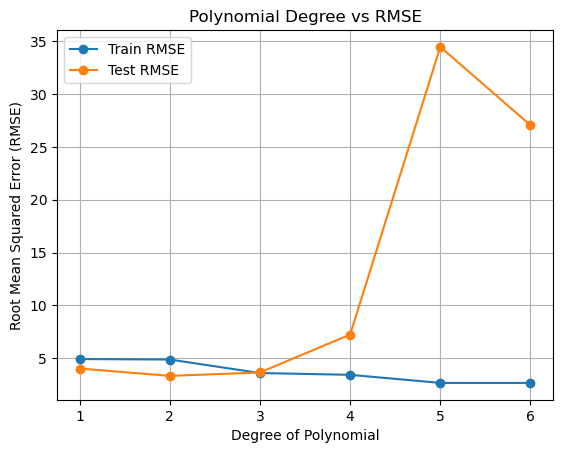

In [40]:
import matplotlib.pyplot as plt

degrees = range(1, 7)

plt.plot(degrees, train_rmse_errors, marker='o', label='Train RMSE')
plt.plot(degrees, test_rmse_errors, marker='o', label='Test RMSE')

plt.title('Polynomial Degree vs RMSE')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.legend()
plt.grid(True)
plt.xticks(degrees)
plt.show()

In [46]:
final_poly_converter = PolynomialFeatures(degree=2, include_bias= False)
final_model = LinearRegression()

full_converted_X = final_poly_converter.fit_transform(X)

final_model.fit(full_converted_X, y)

from joblib import dump, load

dump(final_poly_converter, 'final_converter.joblib')
dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [50]:
loaded_converter = load('final_converter.joblib')
loaded_model = load('final_poly_model.joblib')

new_data = [5.5], [15]

converted_data = loaded_converter.fit_transform(new_data)
loaded_model.predict(converted_data)

array([109.34604763, 242.67573342])